In [1]:
import xarray as xr
import pandas as pd

In [2]:
combined_da= {
    "wind_fixed_era5": xr.open_dataarray("timeseries_data/fixed_wind_era5.nc"),
    "wind_1_era5": xr.open_dataarray("timeseries_data/extendable_wind_era5_1.nc"),
    "wind_10_era5" : xr.open_dataarray("timeseries_data/extendable_wind_era5_10.nc"),
    "wind_34_era5": xr.open_dataarray("timeseries_data/extendable_wind_era5_34.nc"),
    "wind_fixed_wasa": xr.open_dataarray("timeseries_data/fixed_wind_wasa.nc"),
    "wind_1_wasa": xr.open_dataarray("timeseries_data/extendable_wind_wasa_1.nc"),
    "wind_10_wasa": xr.open_dataarray("timeseries_data/extendable_wind_wasa_10.nc"),
    "wind_34_wasa": xr.open_dataarray("timeseries_data/extendable_wind_wasa_34.nc"),     
    
    "wind_fixed_csir": xr.open_dataarray("timeseries_data/fixed_wind_csir.nc"),
    "wind_1_csir": xr.open_dataarray("timeseries_data/extendable_wind_csir_1.nc"),
    "wind_27_csir": xr.open_dataarray("timeseries_data/extendable_wind_csir_27.nc"),
    
    "solar_pv_fixed_sarah": xr.open_dataarray("timeseries_data/fixed_solar_pv_sarah.nc"),
    "solar_pv_1_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_1.nc").sel(_type="Single Axis"),
    "solar_pv_10_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_10.nc").sel(_type="Single Axis"),
    "solar_pv_34_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_34.nc").sel(_type="Single Axis"),

    "solar_pv_fixed_csir": xr.open_dataarray("timeseries_data/fixed_solar_pv_csir.nc"),
    "solar_pv_1_csir": xr.open_dataarray("timeseries_data/extendable_solar_pv_csir_1.nc").sel(_type="Fixed Tilt"),
    "solar_pv_27_csir": xr.open_dataarray("timeseries_data/extendable_solar_pv_csir_27.nc").sel(_type="Fixed Tilt"),

    "solar_pv_rooftop_1_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_1.nc").sel(_type="Rooftop"),
    "solar_pv_rooftop_10_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_10.nc").sel(_type="Rooftop"),
    "solar_pv_rooftop_34_sarah": xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_34.nc").sel(_type="Rooftop"),

    "solar_pv_rooftop_1_csir": xr.open_dataarray("timeseries_data/extendable_solar_pv_csir_1.nc").sel(_type="Fixed Tilt"),
}

In [3]:
# # Add Rooftop solar PV from extendable to Fixed as well
combined_da["solar_pv_rooftop_fixed_sarah"] = xr.DataArray(
    coords={"time":combined_da["solar_pv_fixed_sarah"].coords["time"], "plant":combined_da["solar_pv_10_sarah"].coords["bus"].values, "param":combined_da["solar_pv_fixed_sarah"].coords["param"]},
    dims=combined_da["solar_pv_fixed_sarah"].dims
    )
combined_da["solar_pv_rooftop_fixed_sarah"].loc[dict(param="pu")] = xr.open_dataarray("timeseries_data/extendable_solar_pv_sarah_10.nc").sel(_type="Rooftop", intra_region="all").values

<Axes: xlabel='time'>

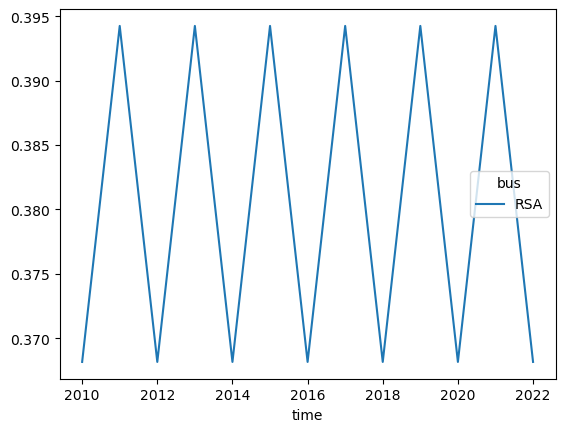

In [11]:
pu = combined_da["wind_1_csir"].sel(intra_region="redz_corridors_eia").to_pandas()
pu.groupby(pu.index.year).mean().plot()

In [4]:
stop

NameError: name 'stop' is not defined

In [ ]:
for name, da in combined_da.items():
    da.to_netcdf("renewable_profiles_updated.nc", mode="a", group=name)